In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [229]:
df = pd.read_excel("C:/Users/sansk/OneDrive/Documents/p1.xlsx")

In [230]:
df.head()

Market_Date        VegName  Price Quantity          ID Mall_Price  \
0  2022-01-26      Mango Raw     71      1kg    mangoRaw   85 - 117   
1  2022-01-26         Carrot     70      1kg      carrot   84 - 116   
2  2022-01-26    Onion Small     63      1kg  onionSmall   76 - 104   
3  2022-01-26  Brinjal (Big)     61      1kg  brinjalBig   73 - 101   
4  2022-01-26         Garlic     61      1kg      garlic   73 - 101   

  Retail_Price  
0      82 - 90  
1      81 - 89  
2      72 - 80  
3      70 - 77  
4      70 - 77

In [258]:
df

Market_Date                VegName  Price Quantity               ID  \
0      2022-01-26              Mango Raw     71      1kg         mangoRaw   
1      2022-01-26                 Carrot     70      1kg           carrot   
2      2022-01-26            Onion Small     63      1kg       onionSmall   
3      2022-01-26          Brinjal (Big)     61      1kg       brinjalBig   
4      2022-01-26                 Garlic     61      1kg           garlic   
...           ...                    ...    ...      ...              ...   
23215  2023-03-31             Drumsticks    120      1kg       drumsticks   
23216  2023-03-31  Raw Banana (Plantain)     10      1kg         plantain   
23217  2023-03-31            Dill Leaves     10      1kg       dillLeaves   
23218  2023-03-31              Mango Raw     98      1kg         mangoRaw   
23219  2023-03-31       Fenugreek Leaves      9      1kg  fenugreekLeaves   

      Mall_Price Retail_Price  Average_Mall_Price  Average_Retail_Price  
0       85 - 117      82 - 90                 101                    86  
1       84 - 116      81 - 89                 100                    85  
2       76 - 104      72 - 80                  90                    76  
3       73 - 101      70 - 77                  87                    73  
4       73 - 101      70 - 77                  87                    73  
...          ...          ...                 ...                   ...  
23215  144 - 198    138 - 152                 171                   145  
23216    12 - 17      12 - 13                  14                    12  
23217    12 - 17      12 - 13                  14                    12  
23218  118 - 162    113 - 124                 140                   118  
23219    11 - 15      10 - 11                  13                    10  

[23220 rows x 9 columns]

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23220 entries, 0 to 23219
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Market_Date   23220 non-null  datetime64[ns]
 1   VegName       23220 non-null  object        
 2   Price         23220 non-null  int64         
 3   Quantity      23220 non-null  object        
 4   ID            23220 non-null  object        
 5   Mall_Price    23220 non-null  object        
 6   Retail_Price  23220 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.2+ MB


In [232]:
df['Average_Mall_Price'] = df['Mall_Price'].apply(lambda x: int(sum(map(int, x.split(' - '))) / 2))
df['Average_Retail_Price'] = df['Retail_Price'].apply(lambda x: int(sum(map(int, x.split(' - '))) / 2))


In [233]:
df.head()

Market_Date        VegName  Price Quantity          ID Mall_Price  \
0  2022-01-26      Mango Raw     71      1kg    mangoRaw   85 - 117   
1  2022-01-26         Carrot     70      1kg      carrot   84 - 116   
2  2022-01-26    Onion Small     63      1kg  onionSmall   76 - 104   
3  2022-01-26  Brinjal (Big)     61      1kg  brinjalBig   73 - 101   
4  2022-01-26         Garlic     61      1kg      garlic   73 - 101   

  Retail_Price  Average_Mall_Price  Average_Retail_Price  
0      82 - 90                 101                    86  
1      81 - 89                 100                    85  
2      72 - 80                  90                    76  
3      70 - 77                  87                    73  
4      70 - 77                  87                    73

In [234]:
average_monthly_price

VegName Market_Date      Price
0    Amaranth Leaves  2022-01-31  14.666667
1    Amaranth Leaves  2022-02-28  14.535714
2    Amaranth Leaves  2022-03-31  15.774194
3    Amaranth Leaves  2022-04-30  15.233333
4    Amaranth Leaves  2022-05-31  15.129032
..               ...         ...        ...
805           Tomato  2022-11-30  22.500000
806           Tomato  2022-12-31  18.258065
807           Tomato  2023-01-31  22.967742
808           Tomato  2023-02-28  23.928571
809           Tomato  2023-03-31  26.129032

[810 rows x 3 columns]

# Que 3 - Using the data available on the above website, can we identify any differences or similarities in the prices of vegetables in Noida Vegetable Market and nearby located vegetable markets, and what could be the possible reasons for such variations in prices?

In [323]:
df['Price'] = df['Price'].ascending=True

In [324]:
df['Price']

0        True
1        True
2        True
3        True
4        True
         ... 
23215    True
23216    True
23217    True
23218    True
23219    True
Name: Price, Length: 23220, dtype: bool

In [308]:
grouped_data = df.groupby(["Market_Date", "VegName"])["Price"].mean().reset_index()

In [309]:
grouped_data

Market_Date          VegName  Price
0      2022-01-26  Amaranth Leaves   16.0
1      2022-01-26             Amla   50.0
2      2022-01-26        Ash gourd   21.0
3      2022-01-26        Baby Corn   55.0
4      2022-01-26    Banana Flower   17.0
...           ...              ...    ...
23215  2023-03-31      Snake Gourd   30.0
23216  2023-03-31    Sorrel Leaves   14.0
23217  2023-03-31          Spinach   15.0
23218  2023-03-31     Sweet Potato   39.0
23219  2023-03-31           Tomato   21.0

[23220 rows x 3 columns]

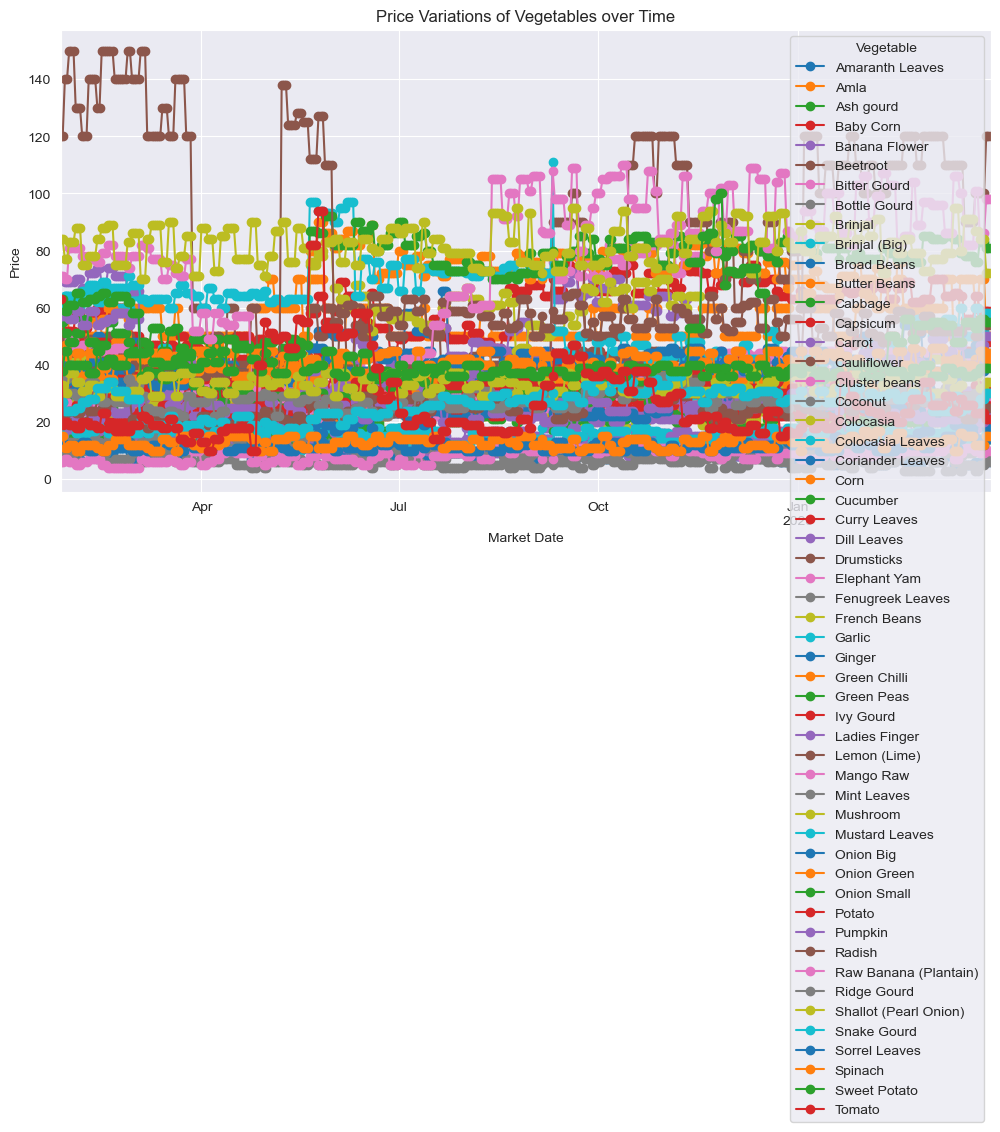

In [312]:
piv_data = grouped_data.pivot(index='Market_Date', columns='VegName', values='Price')
time = piv_data.plot(figsize=(12, 6), marker='o')
time.set_xlabel('Market Date')
time.set_ylabel('Price')
time.set_title('Price Variations of Vegetables over Time')
time.legend(title='Vegetable')
plt.show()

# Que 4- What are the seasonal vegetables in Noida Vegetable Market and nearby markets based on their prices?

In [218]:
df['Market_Date'] = pd.to_datetime(df['Market_Date'])
seasonal_vegetables = {}
for month in range(1, 13):
    data = df[df['Market_Date'].dt.month == month] 
    vegetables = data['VegName'].unique().tolist()
    seasonal_vegetables[month] = vegetables
seasonal_vegetables_list = list(set().union(*seasonal_vegetables.values()))
print(seasonal_vegetables_list)


['Butter Beans', 'Baby Corn', 'Capsicum', 'Ridge Gourd', 'Broad Beans', 'Coriander Leaves', 'Brinjal (Big)', 'Mushroom', 'Coconut', 'Pumpkin', 'Drumsticks', 'Cabbage', 'Spinach', 'Mint Leaves', 'Sorrel Leaves', 'Fenugreek Leaves', 'Carrot', 'Brinjal', 'Cucumber', 'Bitter Gourd', 'Snake Gourd', 'Mango Raw', 'Colocasia Leaves', 'Bottle Gourd', 'Elephant Yam', 'Radish', 'Onion Green', 'Raw Banana (Plantain)', 'Tomato', 'Cauliflower', 'Dill Leaves', 'Amla', 'Cluster beans', 'Ash gourd', 'Ivy Gourd', 'Colocasia', 'Potato', 'Green Chilli', 'Beetroot', 'Curry Leaves', 'French Beans', 'Mustard Leaves', 'Ginger', 'Corn', 'Ladies Finger', 'Shallot (Pearl Onion)', 'Banana Flower', 'Garlic', 'Onion Small', 'Green Peas', 'Sweet Potato', 'Lemon (Lime)', 'Onion Big', 'Amaranth Leaves']


In [235]:
vegetable_prices_df = pd.DataFrame.from_dict(vegetable_prices, orient='index', columns=['Price'])
vegetable_prices_sorted = vegetable_prices_df.sort_values('Price').round(0)
for index, row in vegetable_prices_sorted.iterrows():
    print(index, "-", row['Price'])


Mint Leaves - 6.0
Raw Banana (Plantain) - 8.0
Coriander Leaves - 9.0
Fenugreek Leaves - 10.0
Sorrel Leaves - 12.0
Amaranth Leaves - 12.0
Dill Leaves - 13.0
Colocasia Leaves - 13.0
Spinach - 13.0
Mustard Leaves - 16.0
Banana Flower - 16.0
Cucumber - 20.0
Cabbage - 23.0
Ash gourd - 23.0
Pumpkin - 25.0
Bottle Gourd - 25.0
Radish - 25.0
Colocasia - 25.0
Onion Big - 26.0
Corn - 26.0
Snake Gourd - 27.0
Ivy Gourd - 27.0
Elephant Yam - 27.0
Tomato - 27.0
Brinjal - 28.0
Ridge Gourd - 28.0
Potato - 29.0
Coconut - 29.0
Cauliflower - 30.0
Curry Leaves - 31.0
Bitter Gourd - 32.0
Ladies Finger - 32.0
Shallot (Pearl Onion) - 33.0
Beetroot - 36.0
Broad Beans - 38.0
Green Chilli - 38.0
Capsicum - 39.0
Sweet Potato - 39.0
Onion - 41.0
Onion Green - 41.0
Ginger - 41.0
Carrot - 44.0
Cluster beans - 44.0
French Beans - 45.0
Lemon (Lime) - 55.0
Amla - 56.0
Garlic (Big) - 59.0
Baby Corn - 59.0
Butter Beans - 65.0
Green Peas - 72.0
Mango - 75.0
Drumsticks - 81.0
Mushroom - 82.0


# Que 5 - For a family with a low-income group, middle-income group, and high-income group what would be the total cost of a vegetable basket containing at least 2 seasonal vegetables, 1 non-seasonal vegetable, some potato, some onion, and others?

# For Low-income-group

In [ ]:
#Here I am consider less than 20 rs will be the first preferance for the low income group population

In [254]:
# for the 2 seasonal vegetable
vegetable_basket = df[df['Price'] == 20].head(2)
# for the 1 seasonal vegetable
vegetable_basket = vegetable_basket.append(df[df['Price'] == 20].head(1),ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Potato','Price':29},ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Onion','Price':41},ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Others','Price':60},ignore_index=True)

Total_cost_low = vegetable_basket['Price'].sum()
print("Total_cost for Low-Income_group : ",Total_cost_low)

Total_cost for Low-Income_group :  190


C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2746605958.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append(df[df['Price'] == 20].head(1),ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2746605958.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append({'VegName':'Potato','Price':29},ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2746605958.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append({'VegName':'Onion','Price':41},ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2746605958.py:7: FutureWarning: The frame.append method is deprec

# For Middle-income-group

In [ ]:
#Here I am considering Price range between >20 and <50 will be 

In [253]:
# for the 2 seasonal vegetable
vegetable_basket = df[df['Price'] == 45].head(2)
# for the 1 seasonal vegetable
vegetable_basket = vegetable_basket.append(df[df['Price'] == 45].head(1),ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Potato','Price':29},ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Onion','Price':41},ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Others','Price':60},ignore_index=True)

Total_cost_middle = vegetable_basket['Price'].sum()
print("Total_cost for Middle-Income_group : ",Total_cost_middle)

Total_cost for Middle-Income_group :  265


C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\4048898735.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append(df[df['Price'] == 45].head(1),ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\4048898735.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append({'VegName':'Potato','Price':29},ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\4048898735.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append({'VegName':'Onion','Price':41},ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\4048898735.py:7: FutureWarning: The frame.append method is deprec

# For High-income-group

In [ ]:
#Here I am considering Price range between >50 will be 
# considering Maximum price

In [252]:
# for the 2 seasonal vegetable
vegetable_basket = df[df['Price'] == 82].head(2)
# for the 1 seasonal vegetable
vegetable_basket = vegetable_basket.append(df[df['Price'] == 82].head(1),ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Potato','Price':29},ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Onion','Price':41},ignore_index=True)
vegetable_basket = vegetable_basket.append({'VegName':'Others','Price':60},ignore_index=True)

Total_cost_high = vegetable_basket['Price'].sum()
print("Total_cost for High-Income_group : ",Total_cost_high)

Total_cost for High-Income_group :  376


C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2219782619.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append(df[df['Price'] == 82].head(1),ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2219782619.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append({'VegName':'Potato','Price':29},ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2219782619.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vegetable_basket = vegetable_basket.append({'VegName':'Onion','Price':41},ignore_index=True)
C:\Users\sansk\AppData\Local\Temp\ipykernel_21760\2219782619.py:7: FutureWarning: The frame.append method is deprec

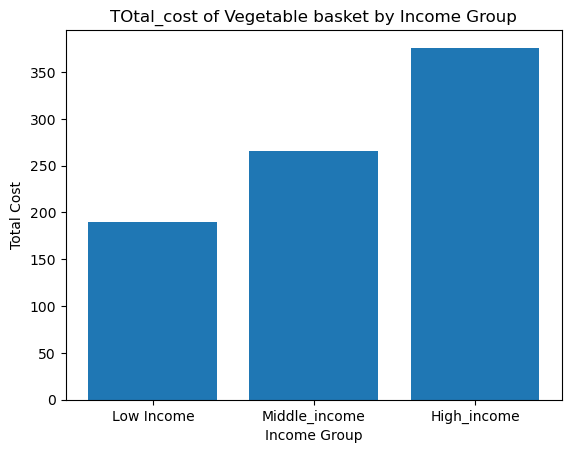

In [248]:
total_cost = [190, 265 ,376]
Income_groups = 

['Low Income', 'Middle_income', 'High_income']
plt.bar(Income_groups,total_cost)
plt.xlabel('Income Group')
plt.ylabel('Total Cost')
plt.title('Total_cost of Vegetable basket by Income Group')
plt.show()


# Que 6 - How do the prices of the vegetable basket change over time for each income group?

In [298]:
basket_price = df[['Market_Date','VegName','Price','ID']]

In [315]:
change_price = basket_price.groupby(['Market_Date','ID'])['Price'].mean().reset_index()

In [316]:
changes_over_time = change_price.pivot(index='Market_Date',columns = 'ID',values ='Price')
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
for column in changes_over_time.columns:
    plt.plot(changes_over_time,changes_over_time[column],label=column)
plt.xlabel('Market Date')
plt.ylabel('Price')
plt.title('Price change of vegetable Basket over Time')

plt.legend(title='Income Group',loc='lower left')
plt.xticks(rotation =45)
plt.show()


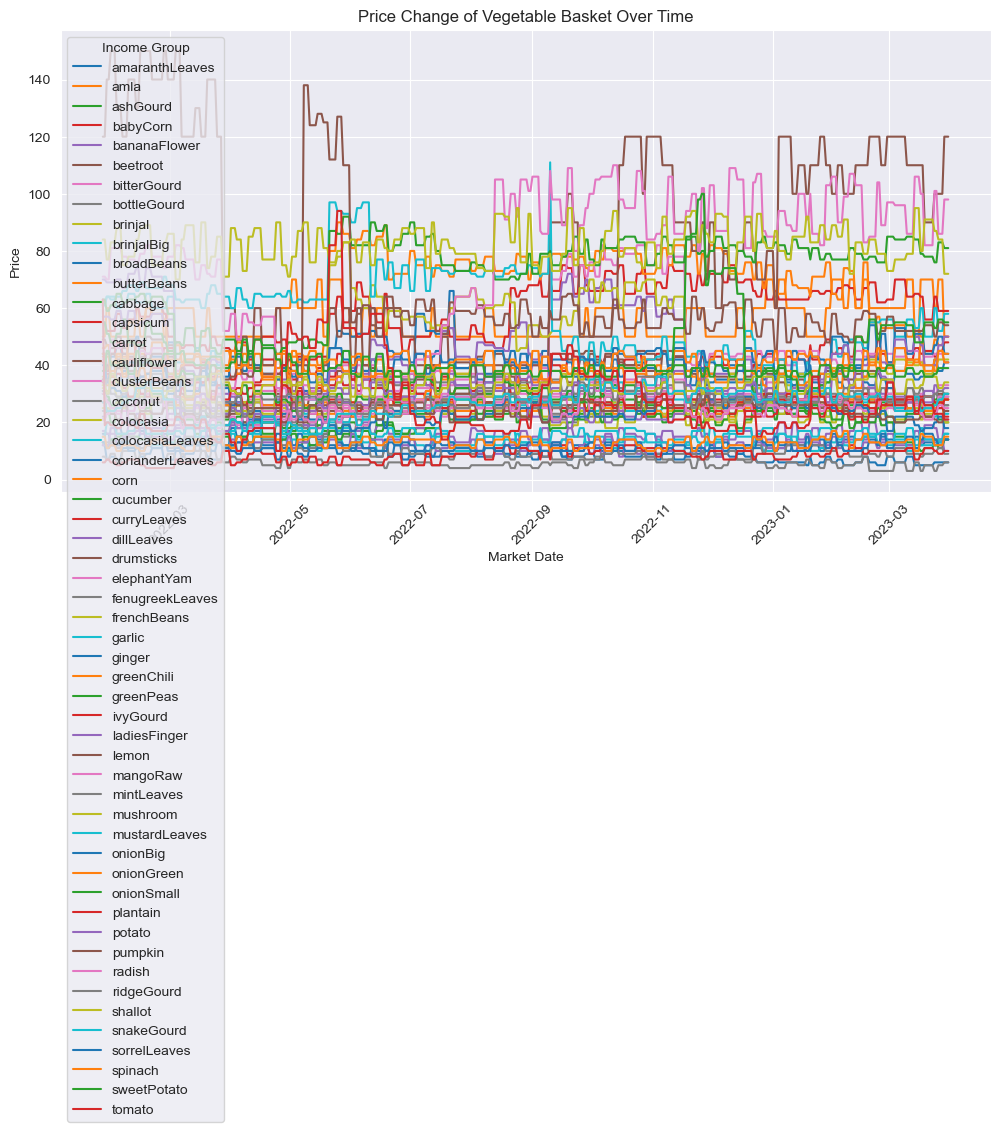

In [297]:
basket_price = df[['Market_Date', 'VegName', 'Price', 'ID']]
change_price = basket_price.groupby(['Market_Date', 'ID'])['Price'].mean().reset_index()
changes_over_time = change_price.pivot(index='Market_Date', columns='ID', values='Price')
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
for column in changes_over_time.columns:
    plt.plot(changes_over_time.index, changes_over_time[column], label=column)

plt.xlabel('Market Date')
plt.ylabel('Price')
plt.title('Price Change of Vegetable Basket Over Time')

plt.legend(title='Income Group', loc='upper left')
plt.xticks(rotation=45)
plt.show()


# Que 7 - What is the inflation rate for each income group based on the prices of the vegetable basket?

In [259]:
df['Market_Date'] = pd.to_datetime(df['Market_Date'])


In [260]:
df['Market_Date'] 

0       2022-01-26
1       2022-01-26
2       2022-01-26
3       2022-01-26
4       2022-01-26
           ...    
23215   2023-03-31
23216   2023-03-31
23217   2023-03-31
23218   2023-03-31
23219   2023-03-31
Name: Market_Date, Length: 23220, dtype: datetime64[ns]

In [261]:
df['Month'] = df['Market_Date'].dt.month
df['Year'] = df['Market_Date'].dt.year


In [262]:
monthly_avg_prices = df.groupby(['VegName', 'Month', 'Year'])['Price'].mean().reset_index()


In [263]:
monthly_avg_prices

VegName  Month  Year      Price
0    Amaranth Leaves      1  2022  14.666667
1    Amaranth Leaves      1  2023  11.354839
2    Amaranth Leaves      2  2022  14.535714
3    Amaranth Leaves      2  2023  14.071429
4    Amaranth Leaves      3  2022  15.774194
..               ...    ...   ...        ...
805           Tomato      8  2022  17.935484
806           Tomato      9  2022  37.766667
807           Tomato     10  2022  34.580645
808           Tomato     11  2022  22.500000
809           Tomato     12  2022  18.258065

[810 rows x 4 columns]

In [264]:
df['Market_Date'] = pd.to_datetime(df['Market_Date'])
df['Month'] = df['Market_Date'].dt.month
df['Year'] = df['Market_Date'].dt.year
monthly_avg_prices = df.groupby(['VegName', 'Month', 'Year'])['Price'].mean().reset_index()
monthly_avg_prices['Price_Difference'] = monthly_avg_prices.groupby('VegName')['Price'].diff()
print(monthly_avg_prices)


             VegName  Month  Year      Price  Price_Difference
0    Amaranth Leaves      1  2022  14.666667               NaN
1    Amaranth Leaves      1  2023  11.354839         -3.311828
2    Amaranth Leaves      2  2022  14.535714          3.180876
3    Amaranth Leaves      2  2023  14.071429         -0.464286
4    Amaranth Leaves      3  2022  15.774194          1.702765
..               ...    ...   ...        ...               ...
805           Tomato      8  2022  17.935484         -1.354839
806           Tomato      9  2022  37.766667         19.831183
807           Tomato     10  2022  34.580645         -3.186022
808           Tomato     11  2022  22.500000        -12.080645
809           Tomato     12  2022  18.258065         -4.241935

[810 rows x 5 columns]


In [265]:
monthly_avg_prices['Inflation_Rate'] = (monthly_avg_prices['Price_Difference'] / monthly_avg_prices['Price']) * 100


In [266]:
monthly_inflation_rate = monthly_avg_prices.groupby('Month')['Inflation_Rate'].mean().reset_index()


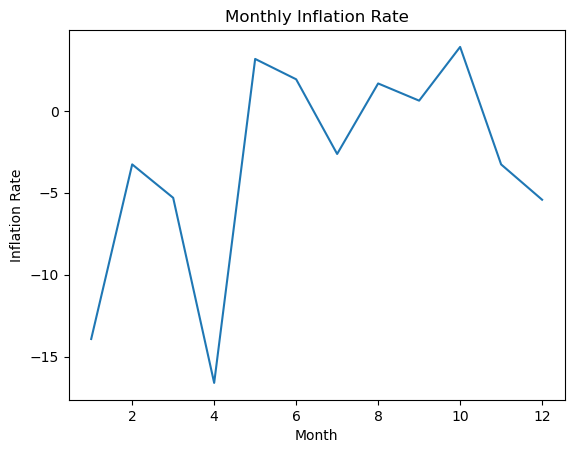

In [267]:
plt.plot(monthly_inflation_rate['Month'], monthly_inflation_rate['Inflation_Rate'])
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.title('Monthly Inflation Rate')
plt.show()


In [18]:
retail_price_average = delhi['Retail_Price'].apply(lambda x: sum(map(int, x.split('-'))) / 2).mean()
shopping_mall_price_average = delhi['Shoping_Mall_Price'].apply(lambda x: sum(map(int, x.split('-'))) / 2).mean()
print("Average Retail Price:", retail_price_average)
print("Average Shopping Mall Price:", shopping_mall_price_average)


Average Retail Price: 40.2209219858156
Average Shopping Mall Price: 47.36812450748621


In [19]:
delhi['Retail_Price_Average'] = delhi['Retail_Price'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

delhi['Shoping_Mall_Price_Average'] = delhi['Shoping_Mall_Price'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

print(delhi)


             Date Vegetable_Name Units  Market_Price Retail_Price  \
0      2022-01-26      Onion Big   1kg            34      39 - 43   
1      2022-01-27      Onion Big   1kg            34      39 - 43   
2      2022-01-28      Onion Big   1kg            39      45 - 50   
3      2022-01-29      Onion Big   1kg            39      45 - 50   
4      2022-01-30      Onion Big   1kg            36      41 - 46   
...           ...            ...   ...           ...          ...   
25375  2023-05-06   Sweet Potato   1kg            37      43 - 47   
25376  2023-05-07   Sweet Potato   1kg            38      44 - 48   
25377  2023-05-08   Sweet Potato   1kg            38      44 - 48   
25378  2023-05-09   Sweet Potato   1kg            38      44 - 48   
25379  2023-05-10   Sweet Potato   1kg            38      44 - 48   

      Shoping_Mall_Price  Retail_Price_Average  Shoping_Mall_Price_Average  
0                41 - 56                  41.0                        48.5  
1                

In [303]:
delhi[['Mall_Price_Min', 'Mall_Price_Max']] = delhi['Mall_Price'].str.split('-', expand=True).astype(float)
delhi[['Retail_Price_Min', 'Retail_Price_Max']] = delhi['Retail_Price'].str.split('-', expand=True).astype(float)

delhi['Mall_Price_Average'] = (delhi['Mall_Price_Min'] + delhi['Mall_Price_Max']) / 2.0
delhi['Retail_Price_Average'] = (delhi['Retail_Price_Min'] + delhi['Retail_Price_Max']) / 2.0

average_price = delhi[['Price', 'Mall_Price_Average', 'Retail_Price_Average']].mean()

print(delhi)


NameError: name 'delhi' is not defined

In [21]:
delhi[['Mall_Price_Min', 'Mall_Price_Max']] = delhi['Shoping_Mall_Price'].str.split('-', expand=True).astype(int)
delhi[['Retail_Price_Min', 'Retail_Price_Max']] = delhi['Retail_Price'].str.split('-', expand=True).astype(int)

delhi['Mall_Price_Average'] = (delhi['Mall_Price_Min'] + delhi['Mall_Price_Max']) / 2
delhi['Retail_Price_Average'] = (delhi['Retail_Price_Min'] + delhi['Retail_Price_Max']) / 2

average_price = delhi[['Market_Price', 'Mall_Price_Average', 'Retail_Price_Average']].mean()




In [22]:
delhi.head()

Date Vegetable_Name Units  Market_Price Retail_Price  \
0  2022-01-26      Onion Big   1kg            34      39 - 43   
1  2022-01-27      Onion Big   1kg            34      39 - 43   
2  2022-01-28      Onion Big   1kg            39      45 - 50   
3  2022-01-29      Onion Big   1kg            39      45 - 50   
4  2022-01-30      Onion Big   1kg            36      41 - 46   

  Shoping_Mall_Price  Retail_Price_Average  Shoping_Mall_Price_Average  \
0            41 - 56                  41.0                        48.5   
1            41 - 56                  41.0                        48.5   
2            47 - 64                  47.5                        55.5   
3            47 - 64                  47.5                        55.5   
4            43 - 59                  43.5                        51.0   

   Mall_Price_Min  Mall_Price_Max  Retail_Price_Min  Retail_Price_Max  \
0              41              56                39                43   
1              41              56                39                43   
2              47              64                45                50   
3              47              64                45                50   
4              43              59                41                46   

   Mall_Price_Average  
0                48.5  
1                48.5  
2                55.5  
3                55.5  
4                51.0

In [23]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25380 entries, 0 to 25379
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        25380 non-null  object 
 1   Vegetable_Name              25380 non-null  object 
 2   Units                       25380 non-null  object 
 3   Market_Price                25380 non-null  int64  
 4   Retail_Price                25380 non-null  object 
 5   Shoping_Mall_Price          25380 non-null  object 
 6   Retail_Price_Average        25380 non-null  float64
 7   Shoping_Mall_Price_Average  25380 non-null  float64
 8   Mall_Price_Min              25380 non-null  int32  
 9   Mall_Price_Max              25380 non-null  int32  
 10  Retail_Price_Min            25380 non-null  int32  
 11  Retail_Price_Max            25380 non-null  int32  
 12  Mall_Price_Average          25380 non-null  float64
dtypes: float64(3), int32(4), int64(

In [24]:
delhi[Shoping_Mall_Price_Average].astype(int64)

NameError: name 'Shoping_Mall_Price_Average' is not defined

In [25]:
average_price

Market_Price            33.222577
Mall_Price_Average      47.368125
Retail_Price_Average    40.220922
dtype: float64

In [26]:
delhi[['Mall_Price_Min', 'Mall_Price_Max']] = delhi[['Mall_Price_Min', 'Mall_Price_Max']].round()
delhi[['Retail_Price_Min', 'Retail_Price_Max']] = delhi[['Retail_Price_Min', 'Retail_Price_Max']].round()
delhi[['Retail_Price_Average', 'Shoping_Mall_Price_Average', 'Mall_Price_Average']] = delhi[['Retail_Price_Average', 'Shoping_Mall_Price_Average', 'Mall_Price_Average']].round()



In [27]:
delhi.head()

Date Vegetable_Name Units  Market_Price Retail_Price  \
0  2022-01-26      Onion Big   1kg            34      39 - 43   
1  2022-01-27      Onion Big   1kg            34      39 - 43   
2  2022-01-28      Onion Big   1kg            39      45 - 50   
3  2022-01-29      Onion Big   1kg            39      45 - 50   
4  2022-01-30      Onion Big   1kg            36      41 - 46   

  Shoping_Mall_Price  Retail_Price_Average  Shoping_Mall_Price_Average  \
0            41 - 56                  41.0                        48.0   
1            41 - 56                  41.0                        48.0   
2            47 - 64                  48.0                        56.0   
3            47 - 64                  48.0                        56.0   
4            43 - 59                  44.0                        51.0   

   Mall_Price_Min  Mall_Price_Max  Retail_Price_Min  Retail_Price_Max  \
0              41              56                39                43   
1              41              56                39                43   
2              47              64                45                50   
3              47              64                45                50   
4              43              59                41                46   

   Mall_Price_Average  
0                48.0  
1                48.0  
2                56.0  
3                56.0  
4                51.0

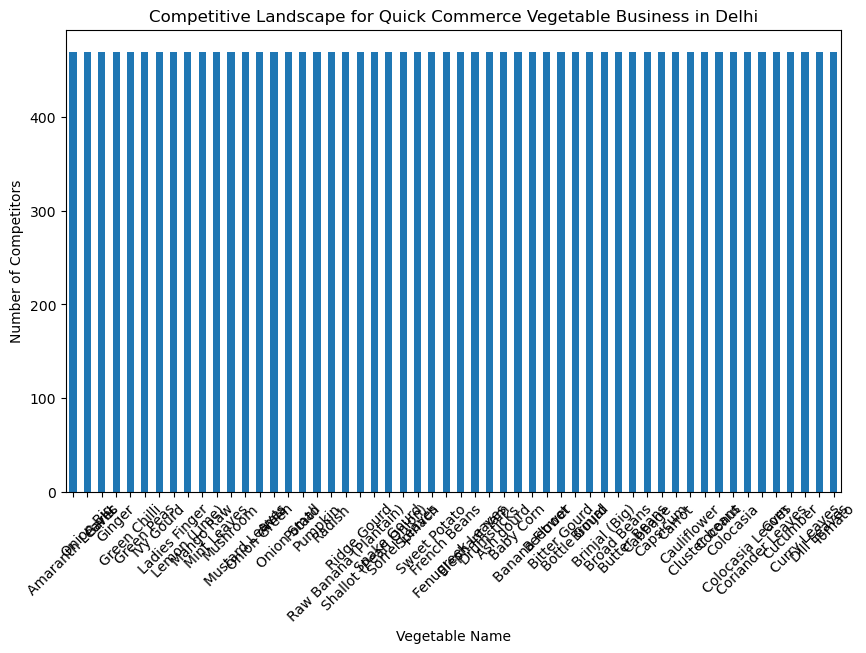

In [31]:
competitor_counts = delhi.groupby('Vegetable_Name').size()
competitor_counts = competitor_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
competitor_counts.plot(kind='bar', xlabel='Vegetable Name', ylabel='Number of Competitors', 
                       title='Competitive Landscape for Quick Commerce Vegetable Business in Delhi')
plt.xticks(rotation=45)
plt.show()


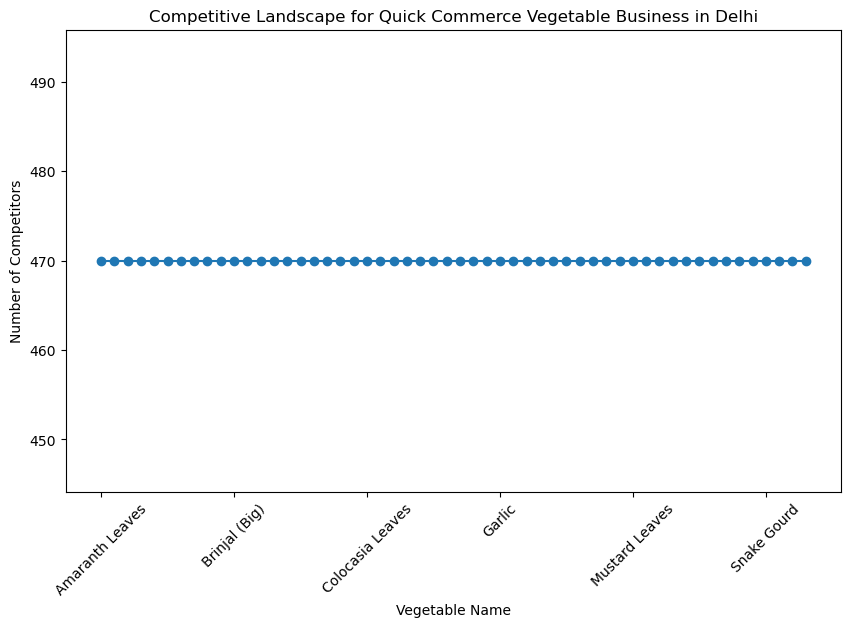

In [32]:
competitor_counts = competitor_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
competitor_counts.plot(kind='line', marker='o', xlabel='Vegetable Name', ylabel='Number of Competitors', 
                       title='Competitive Landscape for Quick Commerce Vegetable Business in Delhi')
plt.xticks(rotation=45)
plt.show()

In [34]:
competitor_counts = delhi['Vegetable_Name'].value_counts()

print(competitor_counts)


Onion Big                470
Lemon (Lime)             470
Drumsticks               470
Brinjal                  470
Brinjal (Big)            470
Elephant Yam             470
Fenugreek Leaves         470
French Beans             470
Garlic                   470
Ginger                   470
Onion Green              470
Green Peas               470
Ivy Gourd                470
Mango Raw                470
Onion Small              470
Mint Leaves              470
Mushroom                 470
Mustard Leaves           470
Ladies Finger            470
Pumpkin                  470
Radish                   470
Ridge Gourd              470
Shallot (Pearl Onion)    470
Snake Gourd              470
Sorrel Leaves            470
Spinach                  470
Dill Leaves              470
Curry Leaves             470
Cucumber                 470
Corn                     470
Tomato                   470
Green Chilli             470
Beetroot                 470
Potato                   470
Raw Banana (Pl

In [35]:
Competition: 
    Supply chain management: 
        Quality control: 
            Inventory management: 
                Last-mile delivery
                Customer retention
                Operational costs: 
                    Regulatory compliance:

SyntaxError: invalid syntax (1403969136.py, line 1)